In [2]:
# imports
import sys
import sklearn
from packaging import version

In [3]:
print("Welcome to machine learning!")

Welcome to machine learning!


In [4]:
assert sys.version_info >= (3,7)

In [5]:
# type(version.parse(sklearn.__version__))
# type(version.parse('1.0.1'))

# assert version.parse(sklearn.__version__) <= version.parse('1.0.1')

assert version.parse(sklearn.__version__) >= version.parse("1.0.1"), \
    f"scikit-learn version too high: {sklearn.__version__}"

In [6]:
from pathlib import Path
p = Path('.')
[x for x in p.iterdir() if x.is_dir()]

[WindowsPath('datasets'), WindowsPath('images')]

In [7]:
list(p.glob('**/*.py'))

[]

In [9]:
# imports
# url = "https://github.com/ageron/data/raw/main/housing.tgz"

# from pathlib import Path
# import pandas as pd
# import urllib.request
# import tarfile

# def load_housing_data():
#     tarball_path = Path("datasets/housing.tgz")
#     if not tarball_path.is_file():
#         Path("datasets").mkdir(parents=True, exist_ok=True)
#         url = "https://github.com/ageron/data/raw/main/housing.tgz"
#         urllib.request.urlretrieve(url, tarball_path)
#     with tarfile.open("tarball_path") as housing_tarball:
#         housing_tarball.extractall(path="datasets")
#     return pd.read_csv(Path("datasets/housing/housing.csv"))

# housing = load_housing_data()

In [10]:
# extra code – code to save the figures as high-res PNGs for the book
import matplotlib.pyplot as plt
from pathlib import Path
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

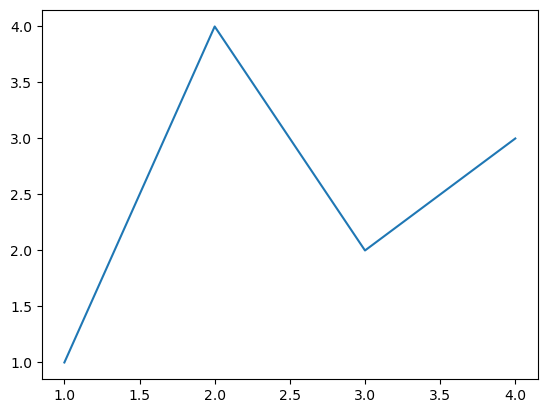

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])

plt.show()

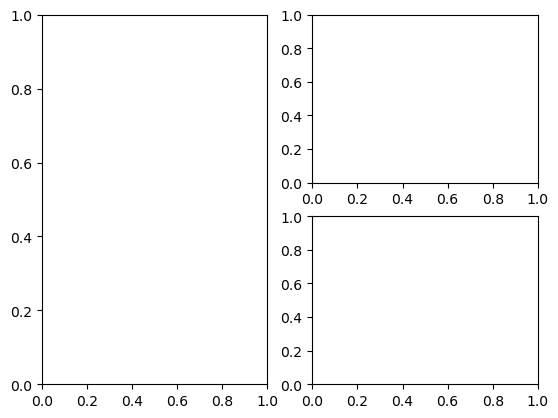

In [12]:
# fig = plt.figure()
# fig, ax = plt.subplots()

# fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

fig, axs = plt.subplot_mosaic([['left', 'right_top'], ['left', 'right_bottom']])

plt.show()

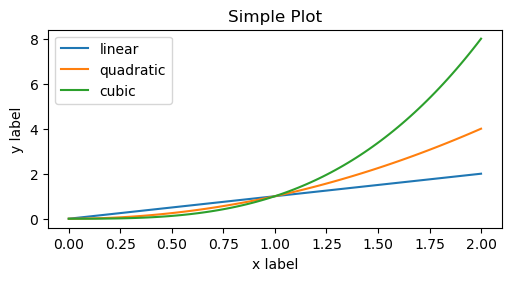

In [13]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the Axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the Axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the Axes.
ax.set_ylabel('y label')  # Add a y-label to the Axes.
ax.set_title("Simple Plot")  # Add a title to the Axes.
ax.legend()  # Add a legend.

In [14]:
import pandas as pd

# Create a sample housing DataFrame
data = {
    "longitude": [-122.23, -122.22, -122.24, -122.25, -122.26],
    "latitude": [37.88, 37.86, 37.85, 37.84, 37.83],
    "housing_median_age": [41, 21, 52, 37, 29],
    "total_rooms": [880, 7099, 1467, 1274, 1627],
    "total_bedrooms": [129, 1106, 190, 235, 280],
    "median_income": [8.3252, 8.3014, 7.2574, 5.6431, 3.8462],
    "median_house_value": [452600, 358500, 352100, 341300, 342200],
}

housing = pd.DataFrame(data)
print(housing)


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880             129   
1    -122.22     37.86                  21         7099            1106   
2    -122.24     37.85                  52         1467             190   
3    -122.25     37.84                  37         1274             235   
4    -122.26     37.83                  29         1627             280   

   median_income  median_house_value  
0         8.3252              452600  
1         8.3014              358500  
2         7.2574              352100  
3         5.6431              341300  
4         3.8462              342200  


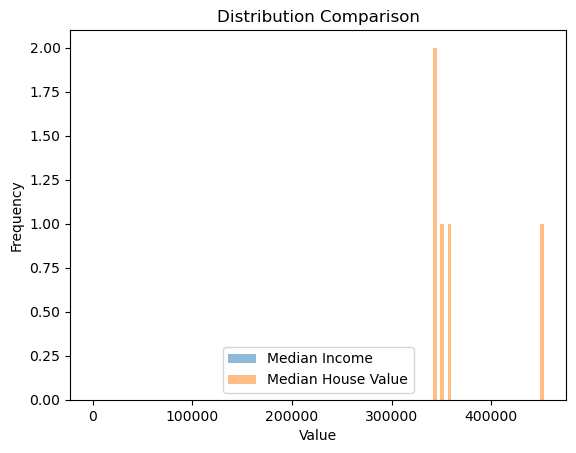

In [15]:
import matplotlib.pyplot as plt

plt.hist(housing['median_income'], bins=30, alpha=0.5, label='Median Income')
plt.hist(housing['median_house_value'], bins=30, alpha=0.5, label='Median House Value')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution Comparison')
plt.show()

In [16]:
# Get randomly distributed data for testing
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [17]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

4

In [18]:
# Data zlib - crc32 hash 
from zlib import crc32

# Check if data is in test set
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [19]:
# add 'index' column
housing_with_id = housing.reset_index()
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [20]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

### SKLearn Model selection

In [21]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [22]:
test_set["total_bedrooms"].isnull().sum()

np.int64(0)

In [23]:
## Binomial theoram usage
# extra code – shows how to compute the 10.7% proba of getting a bad sample

from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)

print(proba_too_small + proba_too_large)

0.10736798530929942


In [24]:
# SKLearn
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

KeyError: 'income_cat'